In [39]:
# import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import glob
import os
from IPython.display import display
import matplotlib.pyplot as plt
from pydub import AudioSegment
import json
from sklearn import preprocessing
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [40]:
film_csv = "/Volumes/Seagate/natasha-diploma/content_data.csv"
trailers_csv = "/Volumes/Seagate/natasha-diploma/trailers.csv"

films = pd.read_csv(film_csv, index_col=None, header=0)
display(films.head())

trailers_meta = pd.read_csv(trailers_csv, index_col=None, header=0)
display(trailers_meta.head())

# df1 = pd.read_csv(film_csv, index_col=None, header=0)
# df2 = pd.read_csv(trailers_csv, index_col=None, header=0)
# trailers_meta_info = pd.merge(df1, df2, left_on='id', right_on='content_id', how='left').drop('id', axis=1)

# display(trailers_meta_info.head())

# trailers_names = []
# all_texts = []
# emotions = []
# for i in range(0, len(trailers_meta_info)):
#     url = trailers_meta_info.iloc[i]['url']
#     trailers_names.append(url[url.rfind('/')+1:-4])
#     tokenizer = RegexTokenizer()
#     text = trailers_meta_info.iloc[i]['synopsis']
#     all_texts.append(text)
    
# tokenizer = RegexTokenizer()
# tokens = tokenizer.split(''.join(all_texts))
# model = FastTextSocialNetworkModel(tokenizer=tokenizer)

# for i in range(0, len(trailers_meta_info)):
#     text = all_texts[i]
#     emotion = model.predict([text])[0]
#     emotions.append(emotion)
    
# trailers_meta_info['trailers_name'] = trailers_names
# trailers_meta_info['emotions'] = emotions
# display(trailers_meta_info.head())

# trailers_meta_info.to_csv(trailers_csv)

,id,title,duration,release_date,restrict,orig_title,kinopoisk_id,imdb_rating,kinopoisk_rating,synopsis,categories,genres,properties
0,60432,Философия Фила,5816.0,2019-04-05,18.0,Phil,960568,5.4,5.86,"Фил – стоматолог, страдающий от депрессии. Его...",{Фильмы},"{Драмы,Зарубежные,Комедии}","{ ""Место действия"" : [""США""], ""Качества"" : [""д..."
1,64219,Зубная фея,5123.0,2019-04-02,18.0,Tooth Fairy,1126022,2.2,0.00,Старая женщина начинает рассказывать легенду о...,{Фильмы},"{Зарубежные,Триллеры,Ужасы}","{ ""Место действия"" : [""не определено""], ""Качес..."
2,65407,Проснись,4667.0,2019-01-19,16.0,Wake Up,1069713,2.9,0.00,"Врач-психиатр исследует дневник девушки, котор...",{Фильмы},"{Боевики,Зарубежные,Криминал,Триллеры,Ужасы}","{ ""Аудитория"" : [""для взрослых"",""для подготовл..."
3,75149,[4k] Адская кухня,6148.0,2019-08-09,16.0,The Kitchen,1117988,5.5,5.50,"Смотрите в 4К! Три жены ирландских гангстеров,...",{Фильмы},"{Боевики,Драмы,Зарубежные,Криминал,По комиксам}","{ ""Настроение"" : [""захватывающие"",""авантюрный""..."
4,75629,[4k] Покемон. Детектив Пикачу,6013.0,2019-05-02,12.0,Pokémon Detective Pikachu,994864,6.6,6.56,Смотрите в 4K! Элитный детектив Пикачу отправл...,"{Для детей,Фильмы}","{Детективы,Зарубежные,Комедии,Семейные,Фильмы,...","{ ""Аудитория"" : [""для детей 13-16 лет"",""9 лет""..."


,Unnamed: 0,Unnamed: 0.1,title_x,duration,release_date,restrict,orig_title,kinopoisk_id,imdb_rating,kinopoisk_rating,...,emotions,Place of act,Qualities,Time of act,Based on,Audience,Mood,Subgenre,About,Theme
0,0,0,Философия Фила,5816.0,2019-04-05,18.0,Phil,960568,5.4,5.86,...,"{'neutral': 0.5312193632125854, 'negative': 0....",['США'],['дебютный'],"['21-й век', 'новейшее время']",['оригинального сценария'],"['для молодёжи', 'для взрослых']","['грустный', 'депрессивный', 'трогательный']","['Драмы', 'Комедийные']","['преследования', 'самозванцы', 'расследование...","['развлекательные', 'психологический']"
1,1,4,Зубная фея,5123.0,2019-04-02,18.0,Tooth Fairy,1126022,2.2,0.00,...,"{'negative': 0.4688006341457367, 'skip': 0.392...",['не определено'],"['зрелищные', 'жанровый', 'неожиданный финал']",['не определено'],"['эпоса и легенд', 'оригинального сценария']","['для взрослых', 'для мужчин', 'для подготовле...","['трагичные', 'мрачные', 'шокирующие', 'захват...","['ужасы', 'триллер']","['преследования', 'страхи', 'дети', 'молодежь'...",['развлекательные']
2,2,5,Проснись,4667.0,2019-01-19,16.0,Wake Up,1069713,2.9,0.00,...,"{'positive': 0.3140605390071869, 'negative': 0...",['не определено'],"['жанровый', 'дебютный']",['новейшее время'],['оригинального сценария'],"['для взрослых', 'для подготовленного зрителя'...","['захватывающие', 'жестокие', 'напряженные', '...","['Драмы', 'Боевики', 'триллер']","['психотерапевты', 'кровь', 'тайна смерти', 'п...","['психологический', 'развлекательные']"
3,3,6,[4k] Адская кухня,6148.0,2019-08-09,16.0,The Kitchen,1117988,5.5,5.50,...,"{'neutral': 0.4765896201133728, 'negative': 0....","['большой город', 'США']","['жанровый', 'остросюжетные']",['20-й век'],['комиксов'],"['для мужчин', 'для женщин', 'для взрослых']","['захватывающие', 'авантюрный', 'жестокие', 'н...","['Боевики', 'Драмы', 'криминальные']","['враги или вражда', 'женщины', 'антигерои', '...","['авантюрные', 'гангстерская']"
4,4,7,[4k] Покемон. Детектив Пикачу,6013.0,2019-05-02,12.0,Pokémon Detective Pikachu,994864,6.6,6.56,...,"{'neutral': 0.4532718360424042, 'negative': 0....","['вымышленная страна (город)', 'большой город']","['частично анимационный', 'зрелищные', 'кассов...",['21-й век'],"['оригинального сценария', 'сериалов']","['для детей 13-16 лет', '9 лет', '8 лет', '7-1...","['авантюрный', 'захватывающие', 'динамичный', ...","['детские', 'Приключенческие', 'Фантастические...","['притяжение противоположностей', 'риск', 'пре...","['развлекательные', 'образовательный']"


In [47]:
def feature_extraction(y, sr):
    hop_length = 256
    frame_length = 512
    
    energy = np.array([
        sum(abs(y[i:i+frame_length]**2))
        for i in range(0, len(y), hop_length)
    ])
    rmse = librosa.feature.rms(y, frame_length=frame_length, hop_length=hop_length, center=True)
    
    frames = range(len(energy))
    t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
    zero_crossings = librosa.zero_crossings(y, sr)
    tempo, beat_times = librosa.beat.beat_track(y, sr=sr, units='time')
    y_harmonic, y_percussive = librosa.effects.hpss(y, margin=(1.0, 5.0))
    Y = librosa.stft(y)
    Ydb = librosa.amplitude_to_db(abs(Y))
    spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
    mfcc = librosa.feature.mfcc(y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    
    return {
        'energy': np.mean(energy),
        'tempo': tempo,
        'zero_cross': np.mean(zero_crossings),
        'beat_times': np.mean(beat_times),
        'harmonic': np.mean(y_harmonic),
        'percussive': np.mean(y_percussive),
        'amplitude': np.mean(Ydb),
        'spectral_rolloff': np.mean(spectral_rolloff),
        'mfcc': np.mean(mfcc),
        'chroma_stft': np.mean(chroma_stft),
        'rmse': np.mean(rmse),
        'spec_bw': np.mean(spec_bw)
    }
    
    
def process_every_five(array):
    new_arr = []
    sum = 0;
    for i in range(len(array)):
        if (i % 5 != 0):
            sum += array[i]
        else:
            new_arr.append(sum)
            sum = 0
            
    return new_arr


def normalize(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    display(normalized_df.head())
    return df
    

In [54]:
img_info_folder = "/Volumes/Seagate/natasha-diploma/videoinfo"
audio_info_folder = "/Volumes/Seagate/natasha-diploma/audioinfo"
audio_folder = "/Volumes/Seagate/natasha-diploma/audio_wav"
for i in range(0, len(trailers_meta)):       
    name = trailers_meta.iloc[i]['trailers_name']
    img_info = img_info_folder + '/' + name + '.csv'
    audio_info = audio_info_folder + '/' + name + '.csv'
    audio = audio_folder + '/' + name + '.wav'
    
#     if not os.path.exists(audio) and not os.path.exists(img_info):
#         print(name)
    
    if os.path.exists(audio) and os.path.exists(img_info):
        print(name, i)
        x, sr = librosa.load(audio)
        audio_duration = librosa.get_duration(x) * 1000

        img_df = pd.read_csv(img_info, index_col=None, header=0)
#         img_df.drop(img_df.columns[img_df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
        scenes = img_df['scene'].iloc[-1]
        dur_per_scene = audio_duration / (scenes + 1)
    
        if 'tempo' in img_df:
            print("pass file: ", img_info)
            continue

        else:
            energy = []
            tempo = []
            centro = []
            zero_cross = []
            beat_times = []
            harmonic = []
            percussive = []
            amplitude = []
            spectral_rolloff = []
            mfcc = []
            chroma_stft = []
            rmse = []
            spec_bw = []
            newAudio = AudioSegment.from_wav(audio)
            for i in range(0, len(img_df)):   
                scene = int(img_df.iloc[i]['scene'])
                if (dur_per_scene * scene >= audio_duration):
                    break
                newAudio_temp = newAudio[dur_per_scene * scene:dur_per_scene * (scene + 1)]
                newAudio_temp.export('newSong.wav', format="wav")

                x_temp, sr_temp = librosa.load('newSong.wav')

                features = feature_extraction(x_temp, sr_temp)

                energy.append(features['energy'])
                tempo.append(features['tempo'])
                zero_cross.append(features['zero_cross'])
                harmonic.append(features['harmonic'])
                percussive.append(features['percussive'])
                amplitude.append(features['amplitude'])
                spectral_rolloff.append(features['spectral_rolloff'])
                mfcc.append(features['mfcc'])
                chroma_stft.append(features['chroma_stft'])
                rmse.append(features['rmse'])
                spec_bw.append(features['spec_bw'])
            img_df['energy'] = energy
            img_df['tempo'] = tempo
            img_df['zero_cross'] = zero_cross
            img_df['harmonic'] = harmonic
            img_df['percussive'] = percussive
            img_df['amplitude'] = amplitude
            img_df['spectral_rolloff'] = spectral_rolloff
            img_df['mfcc'] = mfcc
            img_df['chroma_stft'] = chroma_stft
            img_df['rmse'] = rmse
            img_df['spec_bw'] = spec_bw

            os.remove('newSong.wav')
            img_df.to_csv(img_info)
            print("done with", img_info) 

0abceea32472c573ba7af504fd00fd
2fa0ae09168251b817ab94cd60ce8a
fcbee265edc0503ad53a28c983c5e0
fde0e8cf8408f87356ac8fb722f481
f71302bf45d805cc80d4f8d5c41adc
a1c32f6263e9b6b26cdcbe208fa209
194e610175ced32afa97ed202589a9
1f01cfdb79b08ffde79eecd37760c1
8bd3f4ebba62fa13ace809ba0efb68
8d4386805fff1944baafba236650dd
268fa5408e3080413d87557c7a5a40
31eaaadbe52b0d65e819af4e4ae908
1b988cc0438af387aeb16e8d1d36aa
27d95cd4accb1f17508fcebce4bb3e
c5176f62d9e78b7508e91feed59e73
32818249a83e2412ce506a131c43e0
29882a40ff24e672596d99ff64ae17
5c383cdc4f9194234194d3b3d807d3
1cb6a48e086ab54867ea5ae89b1713
967c11c3edbe5eaaed5b9bb2cd110c
634679bb639198d034489b96eeea50
ab3bf566de4a72493b5d68ef2dc962
921ce8b1f6a9ccc8aa0384d08c1522
908293f3c6eb04489efc9ddc70b224
0c9d3593f104130849949f5f384a4e
6b1e914b7eaa6b0cc99285327db84e
8e1f23602bfa26752e8a81c59d37b6
c1cec0a87f7c0128771c4f472724da
ac82f9a9ba4735c94f72471165f84b
0e696eb09481e4c2250a1312abda92
e9c6656e0585319a4d19d99383d3fc
cc09fdfc041bdba86a0b5663dba967
160d1bb4

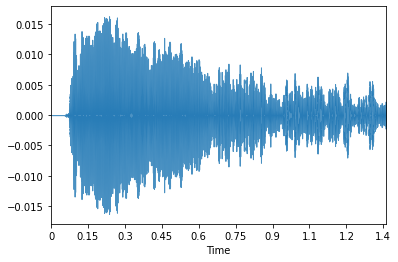

In [38]:
name = '/ea8266aacf6e062847889657104e09'
audio_folder = "/Volumes/Seagate/natasha-diploma/audio_wav"

x, sr = librosa.load(audio_folder + name + '.wav')
ipd.Audio(x, rate=sr)
# plt.figure(figsize=(15, 5))
librosa.display.waveplot(x[:30000], sr, alpha=0.8)

In [34]:
print(x.shape, sr)

(3049074,) 22050


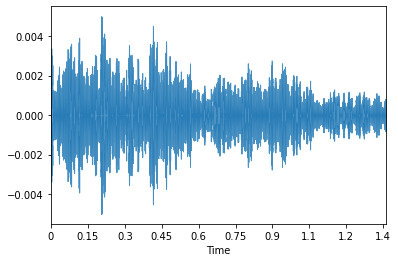

In [35]:
librosa.display.waveplot(x[30000:60000], sr, alpha=0.8)

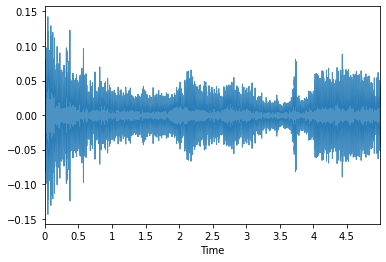

In [36]:
librosa.display.waveplot(x[3049074-200000:3049074-90000], sr, alpha=0.8)

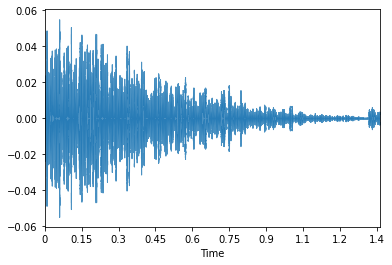

In [37]:
librosa.display.waveplot(x[3049074-30000:3049074], sr, alpha=0.8)

In [50]:
print(len(trailers_meta))

977
